<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Mohammadkaviany/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 31 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [2]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

--2022-10-28 09:09:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32717 (32K) [application/x-httpd-php]
Saving to: ‘Real estate valuation data set.xlsx’

Real estate valuati 100%[===================>]  31.95K  --.-KB/s    in 0.06s   

2022-10-28 09:09:18 (496 KB/s) - ‘Real estate valuation data set.xlsx’ saved [32717/32717]



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("/content/Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
df = df.sort_values("X2 house age")
df.tail(30)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
76,77,2013.583333,35.9,616.40040,3,24.97723,121.53767,36.8
47,48,2013.583333,35.9,640.73910,3,24.97563,121.53715,61.5
42,43,2013.416667,36.1,519.46170,5,24.96305,121.53758,34.7
45,46,2013.083333,36.6,488.81930,8,24.97015,121.54494,38.3
325,326,2013.083333,36.6,488.81930,8,24.97015,121.54494,38.1
396,397,2012.666667,37.1,918.63570,1,24.97198,121.55063,31.9
220,221,2013.333333,37.2,186.51010,9,24.97703,121.54265,78.3
378,379,2013.333333,37.3,587.88770,8,24.97077,121.54634,37.4
290,291,2013.083333,37.7,490.34460,0,24.97217,121.53471,37.0
216,217,2013.250000,37.8,590.92920,1,24.97153,121.53559,39.7


<function matplotlib.pyplot.show(*args, **kw)>

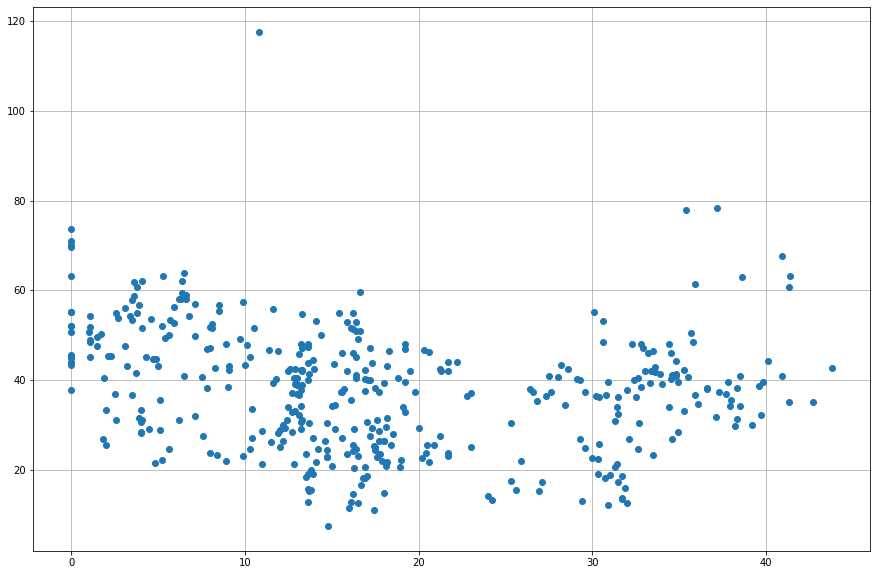

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(df["X2 house age"], df['Y house price of unit area'], "o")
plt.grid()
plt.show

In [6]:
def line(theta0, theta1, x):
  y = theta0 + (theta1 * x)
  return y

In [7]:
theta = np.linspace(0, 1, 500)

In [8]:
def error(theta0, theta1):
  E = 0
  for i in range(len(df)):
    E += (line(theta0, theta1, df["X2 house age"][i]) - df["Y house price of unit area"][i])**2
  
  E /= 2

  error_list.append(E)
  return E

In [9]:
error_list = []
for i in range(500):
  theta0 = theta[np.random.randint(0, 500)]
  theta1 = theta[np.random.randint(0, 500)] 

  error(theta0, theta1)

In [10]:
t0, t1 = np.meshgrid(theta, theta)
z = error(t0, t1)

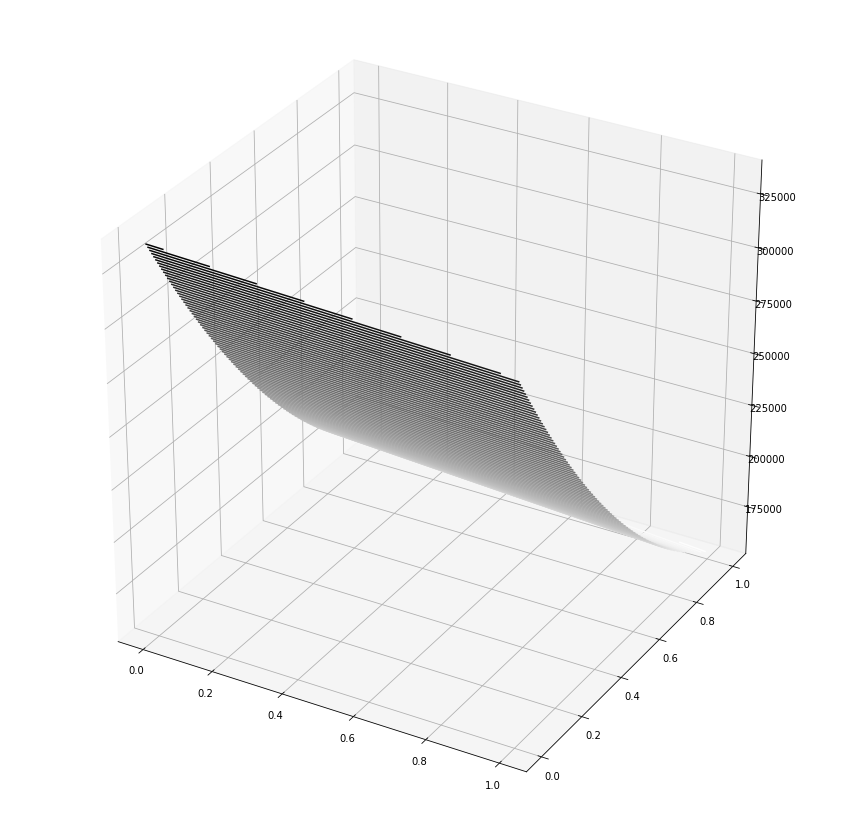

In [11]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.contour3D(theta, theta, z, 100, cmap='binary')

#Gradient Descent

In [ ]:
def gd(theta0_old, theta1_old, a, differential):
  
  while 
  theta0_new = theta0_old + (a * differential)

In [ ]:
def dif_theta0(dx, error):
  value = ( (error(theta0 + dx, theta1)) / dx )
